In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [292]:
data=pd.read_csv("Study Break Patterns.csv")
data.head()
data.columns = data.columns.str.strip()

In [293]:
hours_mapping = {
    'Less than 1 hour': 0.5,  # assuming average of 0.5 for less than 1
    '1-3 hours': 2,  # midpoint of 1-3
    '3-5 hours': 4,  # midpoint of 3-5
    '5+ hours': 6    # assuming average of 6 for 5+
}
data['study_hours_numeric'] = data['How many hours do you study daily?'].map(hours_mapping)

# Convert categorical break frequency to numeric values
breaks_mapping = {
    '0-1': 0.5,
    '2-3': 2.5,  # midpoint of 2-3
    '4-5': 4.5,   # midpoint of 4-5
    'More than 5': 6  # assuming average of 6 for more than 5
}
data['break_frequency_numeric'] = data['How many study breaks do you take per session?'].map(breaks_mapping)

# Convert categorical break duration to numeric values (in minutes)
duration_mapping = {
    'Less than 5 minutes': 3,    # assuming average of 3 for less than 5
    '5-10 minutes': 7.5,         # midpoint of 5-10
    '10-20 minutes': 15.0,        # midpoint of 10-15
    'More than 20 minutes': 25  # assuming average of 17.5 for more than 15
}
data['break_duration_numeric'] = data['How long is each break on average?'].map(duration_mapping)

distracted_mapping = {
    'Yes, very often': 3,
    'Sometimes': 2,
    'Rarely': 1,
    'No, I stay focused': 0
}   
data['distracted_numeric'] = data['Do you get easily distracted while studying?'].map(distracted_mapping)

phone_mapping = {
    'Yes, and I use it often': 3,
    'Yes, but I rarely use it': 2,
    'No, I keep it away': 1,
    'I put it in another room or turn it off': 0
}
data['phone_numeric'] = data['Do you keep your phone close while studying?'].map(phone_mapping)

# Define possible break activities
break_options = ["Scroll social media", "Listen to music", "Walk/stretch", "Eat/snack", "Take a nap", "Other"]

# Create new binary columns (1 if activity is selected, else 0)
for activity in break_options:
    data[activity] = data["What do you do during your breaks? (Check all that apply)"].apply(lambda x: 1 if activity in str(x) else 0)

# Drop the original multi-choice column (optional)
data.drop(columns=["What do you do during your breaks? (Check all that apply)"], inplace=True)

frequent_breaks_mapping = {
    'Yes': 2,
    'No':0,
    'Sometimes':1
}
data['frequent_breaks_numeric'] = data['Do frequent breaks help you stay focused?'].map(frequent_breaks_mapping)

structured_breaks_mapping = {
    'Yes': 2,
    'No':0,
    'Not Sure':1
}
data['structured_breaks_numeric'] = data['Do you follow a structured study method (e.g., Pomodoro technique i.e. break the work into small tasks with break intervals in between)?'].map(structured_breaks_mapping)



# Convert productivity score to numeric (already numeric but ensure it's the right type)
data['productivity_numeric'] = pd.to_numeric(data['On a scale of 1-10, how productive do you feel after taking breaks? (1 = not productive, 10 = very productive)'])


In [294]:
data=data[['study_hours_numeric','break_frequency_numeric','break_duration_numeric','distracted_numeric','phone_numeric','productivity_numeric','Scroll social media','Listen to music','Walk/stretch','Eat/snack','Take a nap','Other','frequent_breaks_numeric','structured_breaks_numeric']]

In [295]:
data.head()

,study_hours_numeric,break_frequency_numeric,break_duration_numeric,distracted_numeric,phone_numeric,productivity_numeric,Scroll social media,Listen to music,Walk/stretch,Eat/snack,Take a nap,Other,frequent_breaks_numeric,structured_breaks_numeric
0,2.0,4.5,7.5,2,2,7,1,1,1,1,1,0,2,2
1,4.0,2.5,3.0,0,1,10,0,0,1,0,0,0,2,2
2,2.0,2.5,15.0,2,3,10,1,1,1,1,1,0,2,2
3,4.0,6.0,15.0,3,0,5,1,1,1,1,1,0,0,1
4,4.0,4.5,7.5,3,3,8,1,0,1,1,0,1,0,0


In [296]:
# Check for missing values
print(data.isnull().sum())

study_hours_numeric          0
break_frequency_numeric      0
break_duration_numeric       0
distracted_numeric           0
phone_numeric                0
productivity_numeric         0
Scroll social media          0
Listen to music              0
Walk/stretch                 0
Eat/snack                    0
Take a nap                   0
Other                        0
frequent_breaks_numeric      0
structured_breaks_numeric    0
dtype: int64


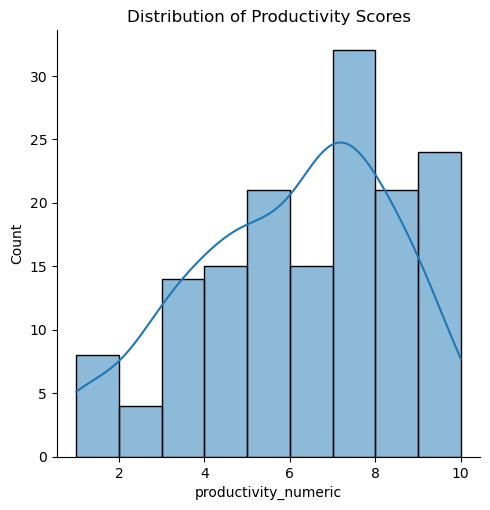

In [297]:
sns.displot(data['productivity_numeric'], kde=True)
plt.title('Distribution of Productivity Scores')
plt.show()  

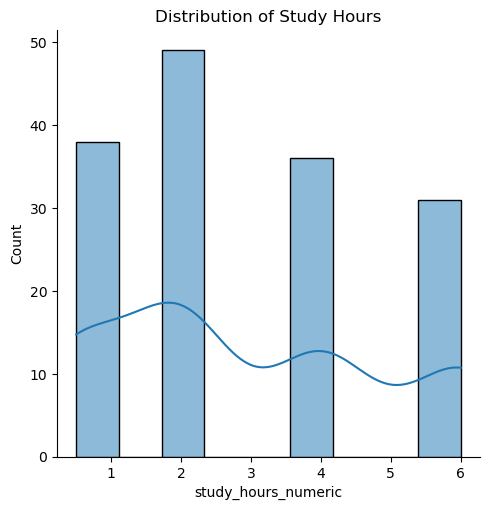

In [298]:
sns.displot(data['study_hours_numeric'], kde=True)
plt.title('Distribution of Study Hours')
plt.show()

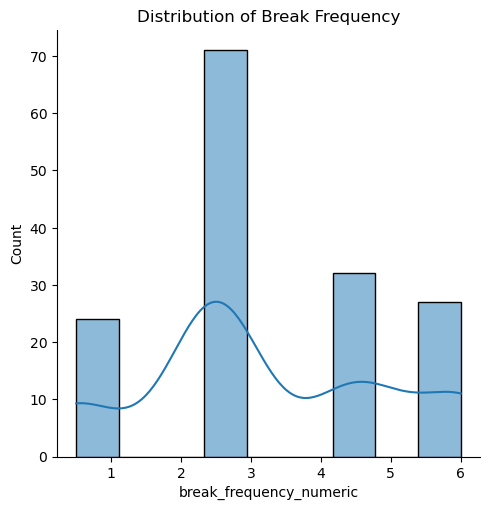

In [299]:
sns.displot(data['break_frequency_numeric'], kde=True)
plt.title('Distribution of Break Frequency')
plt.show()


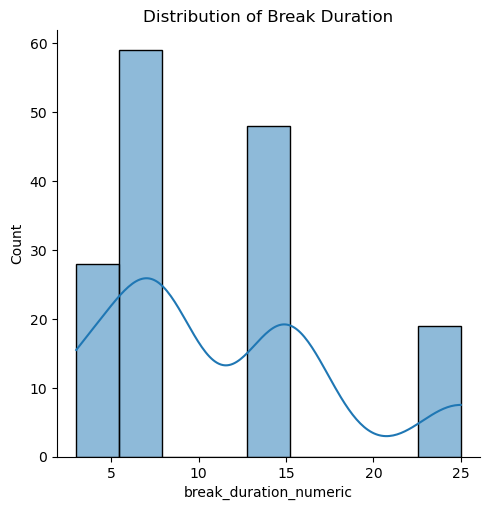

In [300]:
sns.displot(data['break_duration_numeric'], kde=True)
plt.title('Distribution of Break Duration')
plt.show()


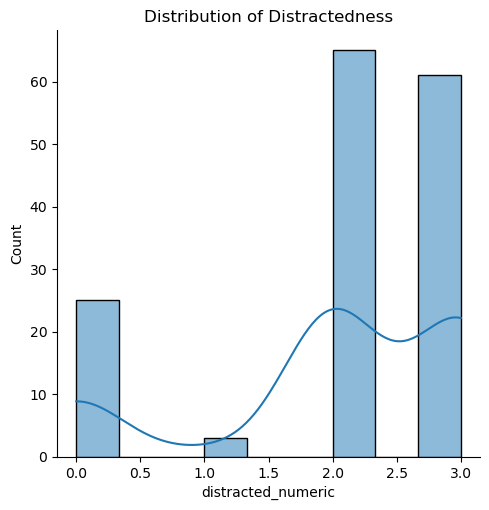

In [301]:
sns.displot(data['distracted_numeric'], kde=True)
plt.title('Distribution of Distractedness')
plt.show()


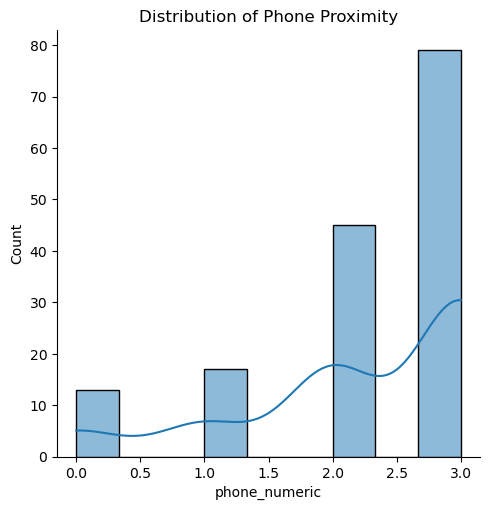

In [302]:
sns.displot(data['phone_numeric'], kde=True)
plt.title('Distribution of Phone Proximity')
plt.show()

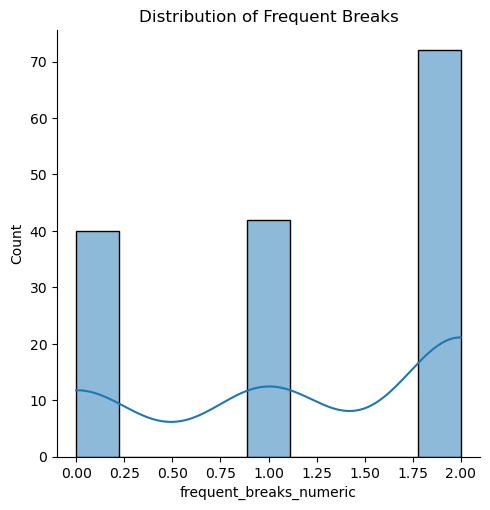

In [303]:
sns.displot(data['frequent_breaks_numeric'], kde=True)
plt.title('Distribution of Frequent Breaks')
plt.show()

C:\Users\ishan\AppData\Local\Temp\ipykernel_29080\3547403300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=break_activity_counts.index, y=break_activity_counts.values, palette="viridis")


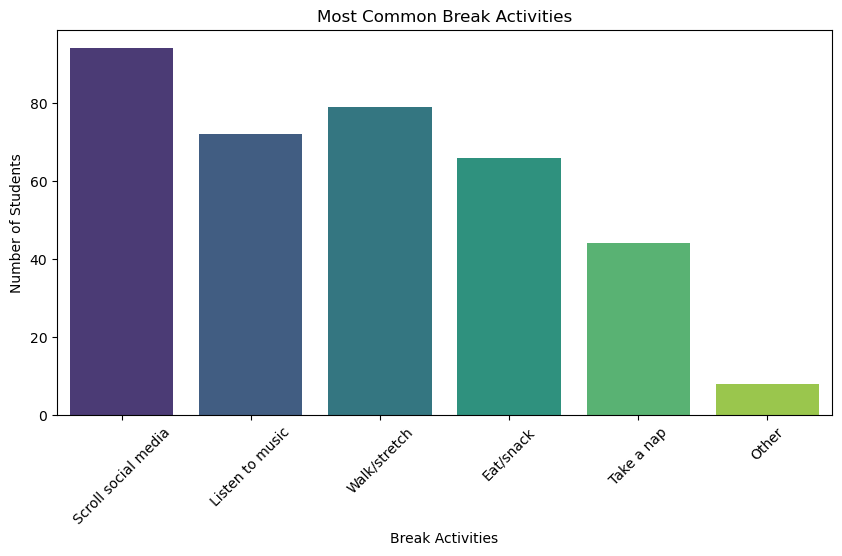

In [304]:
break_activity_counts = data[["Scroll social media", "Listen to music", "Walk/stretch", "Eat/snack", "Take a nap", "Other"]].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=break_activity_counts.index, y=break_activity_counts.values, palette="viridis")

plt.xlabel("Break Activities")
plt.ylabel("Number of Students")
plt.title("Most Common Break Activities")
plt.xticks(rotation=45)
plt.show()

In [305]:
from sklearn.metrics import mean_squared_error, r2_score

In [306]:
X = data[['study_hours_numeric', 'break_frequency_numeric', 'break_duration_numeric', 'distracted_numeric', 'phone_numeric', 'Scroll social media', 'Listen to music', 'Walk/stretch', 'Eat/snack', 'Take a nap', 'Other', 'frequent_breaks_numeric', 'structured_breaks_numeric']]
#X = data[['study_hours_numeric', 'Listen to music', 'Walk/stretch', 'Eat/snack', 'Take a nap', 'Other', 'frequent_breaks_numeric']]
y = data['productivity_numeric']

In [307]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(123, 13)
(31, 13)
(123,)
(31,)


In [308]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

In [309]:
# Print regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Intercept: 4.720647350564508
Coefficient: 0.36389696497149693
Mean Squared Error: 1.0221360121582181
R² Score: 0.7844001958551255


In [310]:
# Feature Importance (Coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                      Feature  Coefficient
11    frequent_breaks_numeric     1.388067
10                      Other     1.298948
5         Scroll social media     0.767157
9                  Take a nap     0.736275
7                Walk/stretch     0.665098
6             Listen to music     0.507777
0         study_hours_numeric     0.363897
8                   Eat/snack     0.322299
2      break_duration_numeric    -0.021828
4               phone_numeric    -0.166123
1     break_frequency_numeric    -0.277436
12  structured_breaks_numeric    -0.414774
3          distracted_numeric    -0.476445


In [311]:
from sklearn.preprocessing import PolynomialFeatures
degree = 1
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Transform the training and testing data
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train the model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predictions
y_pred = model.predict(x_test_poly)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Degree: {degree}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Polynomial Degree: 1
MSE: 1.0221360121582181
RMSE: 1.0110074243833318
R² Score: 0.7844001958551255


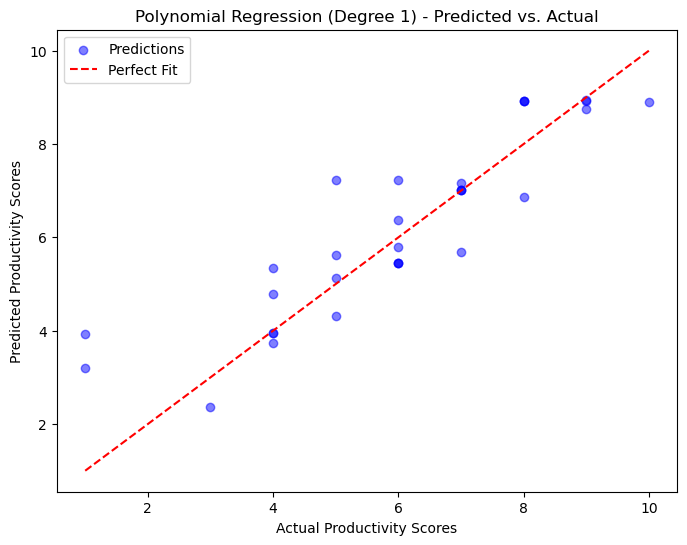

In [312]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predictions")

# Plot the perfect fit line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")

# Labels and Title
plt.xlabel("Actual Productivity Scores")
plt.ylabel("Predicted Productivity Scores")
plt.title(f"Polynomial Regression (Degree {degree}) - Predicted vs. Actual")
plt.legend()
plt.show()

In [313]:
data.to_csv('cleaned_data.csv', index=False)

In [314]:
cov_matrix = data.cov()
print(cov_matrix)

                           study_hours_numeric  ...  structured_breaks_numeric
study_hours_numeric                   3.921823  ...                   1.043460
break_frequency_numeric               0.143876  ...                  -0.172333
break_duration_numeric               -6.096872  ...                  -2.670635
distracted_numeric                   -1.455691  ...                  -0.522961
phone_numeric                        -1.339827  ...                  -0.539598
productivity_numeric                  3.194720  ...                   1.126602
Scroll social media                  -0.691792  ...                  -0.237925
Listen to music                      -0.303837  ...                  -0.072659
Walk/stretch                          0.625456  ...                   0.259783
Eat/snack                            -0.013539  ...                  -0.057890
Take a nap                            0.034547  ...                   0.048553
Other                                -0.037391  ... 

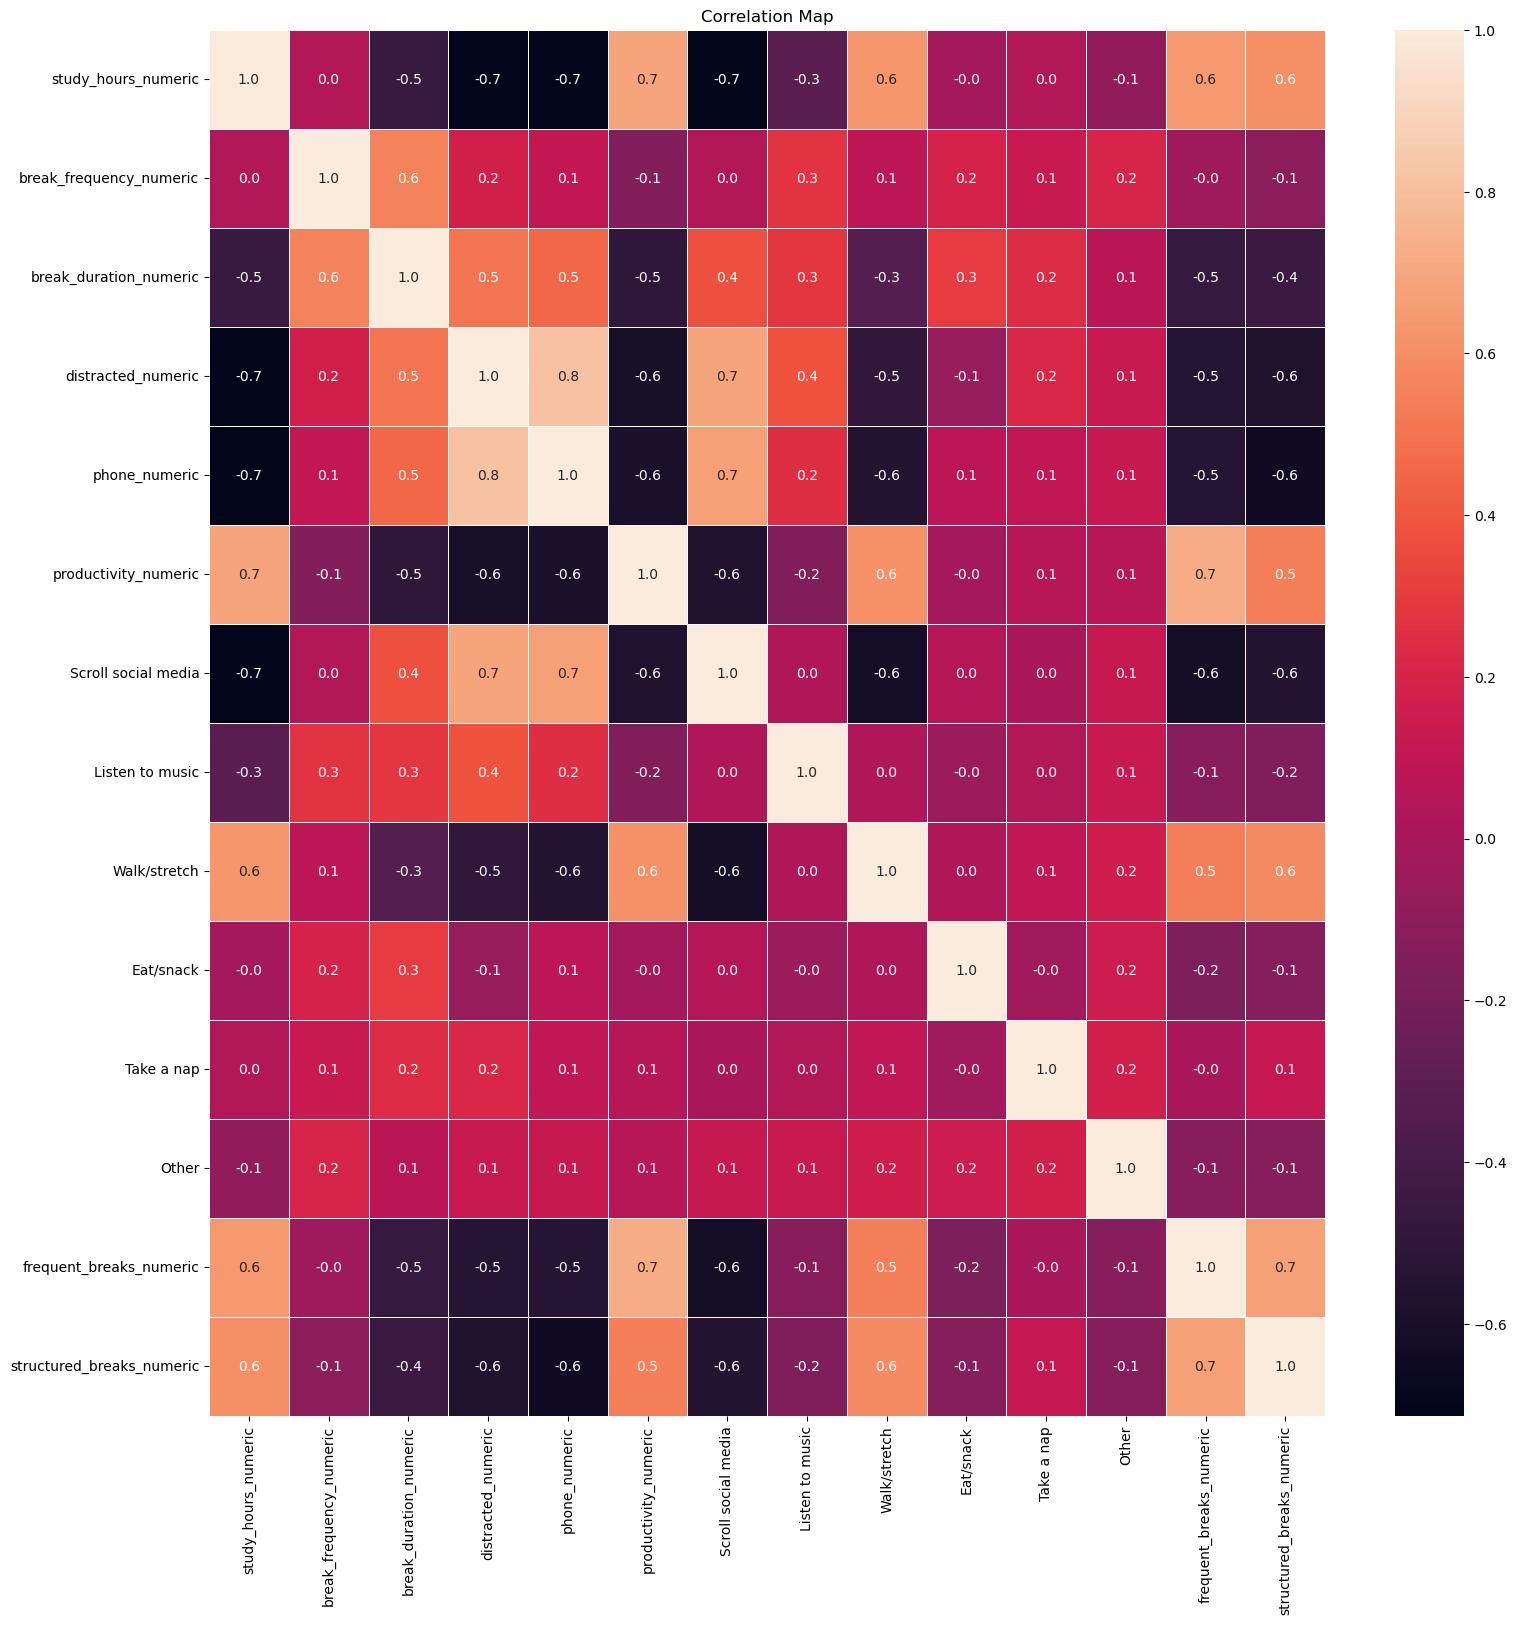

In [315]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()